In [118]:
import numpy as np
import random
# Set the parameter values
theta = np.array([3, 1, 2])

# Set the means and variances for x1 and x2
mean_x1 = 3
var_x1 = 4
mean_x2 = -1
var_x2 = 4

np.random.seed(42)
random.seed(42)
# Set the noise variance
sigma_squared = 2

# Generate 1 million data points
num_data_points = 1000000

# Generate independent variables x1 and x2
x1 = np.random.normal(mean_x1, np.sqrt(var_x1), num_data_points)
x2 = np.random.normal(mean_x2, np.sqrt(var_x2), num_data_points)

# Generate noise for the dependent variable y
noise = np.random.normal(0, np.sqrt(sigma_squared), num_data_points)

# Calculate the dependent variable y based on the linear regression model
y = theta[0] + theta[1] * x1 + theta[2] * x2 + noise

data = np.vstack([x1, x2, y]).T
learning_rate = 0.001

convergence_data = []

import numpy as np



def SGD(data, batch_size, convergence_threshold, learning_rate):
    num_samples = data.shape[0]
    
    # Shuffle data
    np.random.seed(42)
    np.random.shuffle(data)
    
    # Initialize weights
    weights = np.array([0.0, 0.0, 0.0])
    converged = False
    ep = 0.0001
    iterations = 0
    error_history = []
    weights_history = []  # List to store weights at each iteration
    max_iterations = 100000
    
    moving_average_window = 10  # Choose an appropriate window size
    
    while not converged and iterations < max_iterations:
        for i in range(int(num_samples / batch_size)):
        
            x_batch = data[batch_size * i:batch_size * (i + 1), :2]
            y_batch = data[batch_size * i:batch_size * (i + 1), 2]

            y_pred = np.dot(weights, np.vstack([np.ones_like(y_batch), x_batch.T]))
            error = y_batch - y_pred
            err = 1 / batch_size * np.sum((y_batch - y_pred) ** 2)
            error_history.append(err)
            weights_history.append(weights.copy())  # Store a copy of weights

            gradients = - (1 / batch_size) * np.dot(np.vstack([np.ones_like(y_batch), x_batch.T]), error)
            weights -= learning_rate * gradients

            iterations += 1
        
        # Check convergence using moving average
        if iterations >= moving_average_window:
            recent_errors = error_history[-moving_average_window:]
            average_error = sum(recent_errors) / moving_average_window
            if abs(average_error - error_history[-moving_average_window ]) < convergence_threshold:
                converged = True
    
    print("Final Weights:", weights)
    
    return (weights, np.array(weights_history), np.array(error_history), iterations)



In [119]:
batch_1000000 = SGD(data, 1000000, 0.00001, learning_rate)


Final Weights: [2.88424309 1.02538111 1.99245869]


In [120]:
batch_100 = SGD(data, 100, 0.00001, learning_rate)

Final Weights: [3.00049916 1.00216633 1.9987957 ]


In [121]:
batch_10000 = SGD(data, 10000, 0.00001, learning_rate)

Final Weights: [3.00341414 0.99907501 2.00112729]


In [122]:
batch_1 = SGD(data, 1, 0.000001, learning_rate)

Final Weights: [3.04792154 0.96164985 2.03678917]


In [ ]:
import matplotlib.pyplot as plt
def plot_loss(batch, batch_size):
    x_label = np.arange(1,len(batch[2])+1,1)
    
    plt.plot(x_label, batch[2])
    plt.title(f"Loss for Batch Size {batch_size}")
    
df= pd.read_csv('q2test.csv')
x1_test = df['X_1'].values
x2_test = df['X_2'].values
y_test = df['Y'].values
original_hypo = np.array([3,1,2])
def prediction(batch_parameters, x_1, x_2):
    theta0 = batch_parameters[0][0]
    theta1 = batch_parameters[0][1]
    theta2 = batch_parameters[0][2]
    
    y_pred = theta1* x1_test + theta2 * x2_test + theta0
    
    error = np.mean((y_test - y_pred)**2)/2
    
    
    return error

In [135]:
weights_history_1 = batch_1[1]
weights_history_100 = batch_100[1]
weights_history_10000 = batch_10000[1]
weights_history_1000000 = batch_1000000[1]

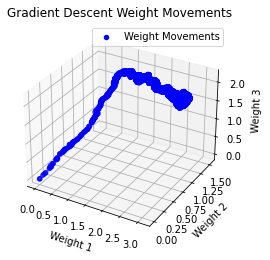

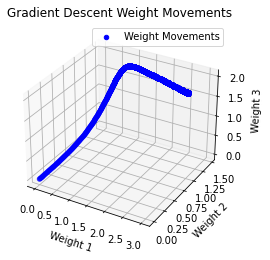

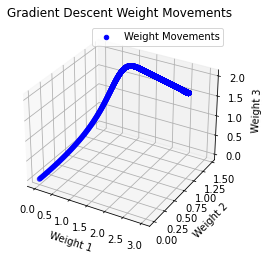

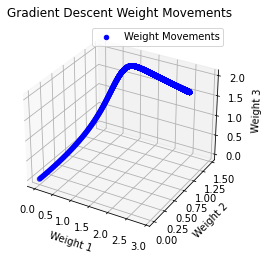

In [136]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_weights_movement(weights_history):
    # Extract the individual weight histories
    weight1_history = weights_history[:, 0]
    weight2_history = weights_history[:, 1]
    weight3_history = weights_history[:, 2]

    # Creating a figure and a 3D subplot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plotting the movements of the weights
    ax.scatter(weight1_history, weight2_history, weight3_history, c='b', marker='o', label='Weight Movements')
    
    # Set labels and a legend
    ax.set_xlabel('Weight 1')
    ax.set_ylabel('Weight 2')
    ax.set_zlabel('Weight 3')
    ax.set_title('Gradient Descent Weight Movements')
    ax.legend()

    
    plt.show()


plot_weights_movement(weights_history_1)
plot_weights_movement(weights_history_100)
plot_weights_movement(weights_history_10000)
plot_weights_movement(weights_history_1000000)

In [143]:
import matplotlib.pyplot as plt
def plot_loss(batch, batch_size):
    x_label = np.arange(1,len(batch[2])+1,1)
    plt.plot(x_label, batch[2])
    plt.title(f"Loss for Batch Size {batch_size}")

In [127]:
df= pd.read_csv('q2test.csv')


In [128]:
x1_test = df['X_1'].values
x2_test = df['X_2'].values
y_test = df['Y'].values
original_hypo = np.array([3,1,2])

In [129]:
def prediction(batch_parameters, x_1, x_2):
    theta0 = batch_parameters[0][0]
    theta1 = batch_parameters[0][1]
    theta2 = batch_parameters[0][2]
    
    y_pred = theta1* x1_test + theta2 * x2_test + theta0
    
    error = np.mean((y_test - y_pred)**2)/2
    
    
    return error

In [130]:
error_1 = prediction(batch_1,x1_test,x2_test)

In [131]:
error_2 = prediction(batch_100,x1_test,x2_test)
error_3 = prediction(batch_10000,x1_test,x2_test)
error_4 = prediction(batch_1000000,x1_test,x2_test)


In [132]:
y_pred = 1* x1_test + 2 * x2_test + 3
error_original = np.mean((y_test - y_pred)**2)/2


In [133]:
print(f"error wrt learned parameters for batch size 1 : {error_1}")
print(f"error wrt learned parameters for batch size 100 : {error_2}")
print(f"error wrt learned parameters for batch size 10000 : {error_3}")
print(f"error wrt learned parameters for batch size 1000000 : {error_4}")
print(f"error wrt original hypothesis : {error_original}")

error wrt learned parameters for batch size 1 : 1.123068500619656
error wrt learned parameters for batch size 100 : 0.9832933681830973
error wrt learned parameters for batch size 10000 : 0.9829362576045388
error wrt learned parameters for batch size 1000000 : 1.0213194898451785
error wrt original hypothesis : 0.9829469215


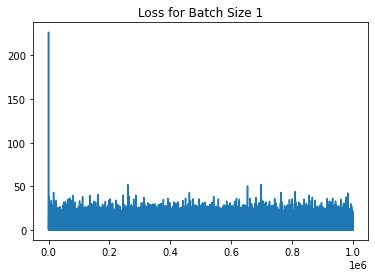

In [145]:
plot_loss(batch_1,1)

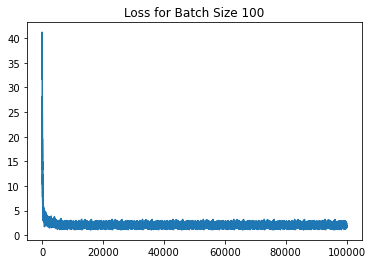

In [144]:
plot_loss(batch_100,100)

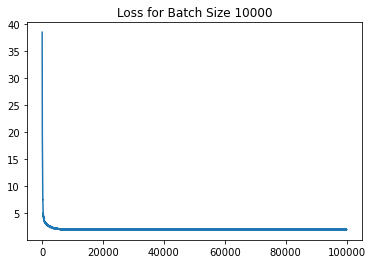

In [146]:
plot_loss(batch_10000,10000)

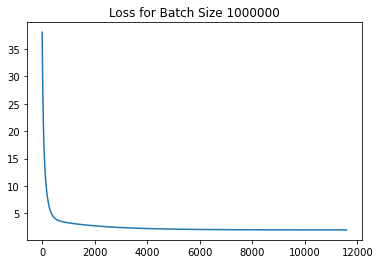

In [147]:
plot_loss(batch_1000000, 1000000)